In [1]:
import pandas as pd
from pathlib import Path
#import pyarrow.parquet as pq

train_path = Path(Path.cwd(), 'data', 'Zzzs_train.parquet', 'Zzzs_train.parquet')
train_path

WindowsPath('g:/Mi unidad/Personal/IMT/3A/Advanced Machine Learning/Project_Sleep_States/data/Zzzs_train.parquet/Zzzs_train.parquet')

In [33]:
train_series = pd.read_parquet(train_path)
print(train_series.head())

      series_id  step                 timestamp     anglez    enmo  awake
0  08db4255286f     0  2018-11-05T10:00:00-0400 -30.845301  0.0447      1
1  08db4255286f     1  2018-11-05T10:00:05-0400 -34.181801  0.0443      1
2  08db4255286f     2  2018-11-05T10:00:10-0400 -33.877102  0.0483      1
3  08db4255286f     3  2018-11-05T10:00:15-0400 -34.282101  0.0680      1
4  08db4255286f     4  2018-11-05T10:00:20-0400 -34.385799  0.0768      1


In [3]:
train_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13165560 entries, 0 to 13165559
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   timestamp  object 
 3   anglez     float32
 4   enmo       float32
 5   awake      int64  
dtypes: float32(2), int64(1), object(2), uint32(1)
memory usage: 452.0+ MB


In [18]:
train_multi_path = Path(Path.cwd(), 'data', 'Zzzs_train_multi.parquet', 'Zzzs_train_multi.parquet')
train_multi_series = pd.read_parquet(train_multi_path)
train_multi_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16289820 entries, 0 to 16289819
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   series_id  object 
 1   step       uint32 
 2   timestamp  object 
 3   anglez     float32
 4   enmo       float32
 5   awake      int64  
dtypes: float32(2), int64(1), object(2), uint32(1)
memory usage: 559.3+ MB


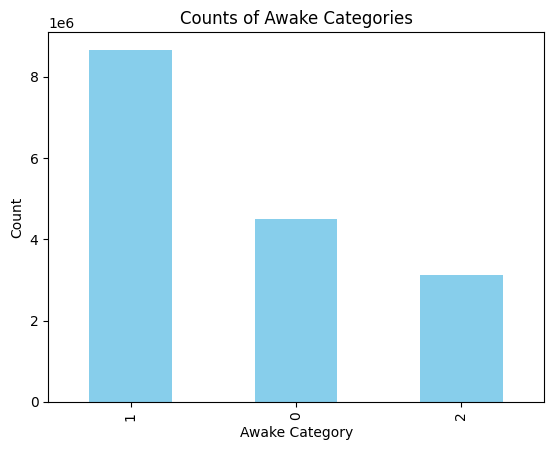

In [20]:
import matplotlib.pyplot as plt
awake_counts = train_multi_series['awake'].value_counts()
awake_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Awake Categories')
plt.xlabel('Awake Category')
plt.ylabel('Count')
plt.show()

In [ ]:
import seaborn as sns

numeric_df = train_series.drop(columns=["series_id", "timestamp"])
corr_matrix = numeric_df.corr()

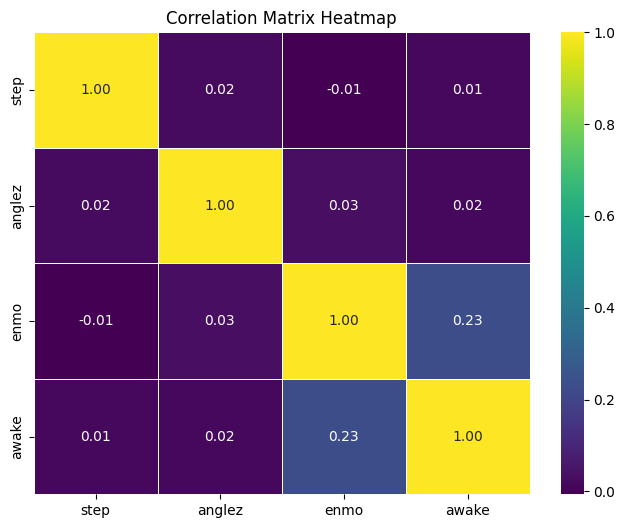

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [7]:
print('awake values:', train_series.awake.value_counts())
print('ID unique values:', train_series.series_id.nunique(), f'\n{train_series.series_id.unique()}')

awake values: awake
1    8660676
0    4504884
Name: count, dtype: int64
ID unique values: 35 
['08db4255286f' '0a96f4993bd7' '0cfc06c129cc' '1087d7b0ff2e'
 '10f8bc1f7b07' '18b61dd5aae8' '29c75c018220' '3452b878e596'
 '349c5562ee2c' '3664fe9233f9' '483d6545417f' '55a47ff9dc8a'
 '5acc9d63b5fd' '5f94bb3e1bed' '655f19eabf1e' '67f5fc60e494'
 '72bbd1ac3edf' '76237b9406d5' '7822ee8fe3ec' '89bd631d1769'
 '8e32047cbc1f' '939932f1822d' '9ee455e4770d' 'a9a2f7fac455'
 'a9e5f5314bcb' 'af91d9a50547' 'b364205aba43' 'c535634d7dcd'
 'c6788e579967' 'c68260cc9e8f' 'ca730dbf521d' 'd150801f3145'
 'd25e479ecbb7' 'd515236bdeec' 'd5e47b94477e']


In [8]:
uniques_ids = train_series.series_id.unique()
for idu in uniques_ids:
    # your_id = "0a96f4993bd7"  
    filtered_df = train_series[train_series["series_id"] == idu]
    print(f'ID {idu} data {filtered_df.shape}')

ID 08db4255286f data (440280, 6)
ID 0a96f4993bd7 data (256860, 6)
ID 0cfc06c129cc data (384660, 6)
ID 1087d7b0ff2e data (410940, 6)
ID 10f8bc1f7b07 data (392400, 6)
ID 18b61dd5aae8 data (495540, 6)
ID 29c75c018220 data (464220, 6)
ID 3452b878e596 data (535500, 6)
ID 349c5562ee2c data (37080, 6)
ID 3664fe9233f9 data (379980, 6)
ID 483d6545417f data (287460, 6)
ID 55a47ff9dc8a data (412740, 6)
ID 5acc9d63b5fd data (407880, 6)
ID 5f94bb3e1bed data (404280, 6)
ID 655f19eabf1e data (387360, 6)
ID 67f5fc60e494 data (376380, 6)
ID 72bbd1ac3edf data (390960, 6)
ID 76237b9406d5 data (412920, 6)
ID 7822ee8fe3ec data (408060, 6)
ID 89bd631d1769 data (429300, 6)
ID 8e32047cbc1f data (405540, 6)
ID 939932f1822d data (414540, 6)
ID 9ee455e4770d data (389880, 6)
ID a9a2f7fac455 data (634680, 6)
ID a9e5f5314bcb data (155160, 6)
ID af91d9a50547 data (411840, 6)
ID b364205aba43 data (401940, 6)
ID c535634d7dcd data (136080, 6)
ID c6788e579967 data (395640, 6)
ID c68260cc9e8f data (310860, 6)
ID ca730dbf

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_relationship(df, x_col, y_col, series_id=None, plot_type="scatter", color='b'):
    """
    Creates two subplots:
    - Top: 'awake' vs x_col (smaller)
    - Bottom: y_col vs x_col (larger)
    
    Parameters:
    - df (DataFrame): The dataset.
    - x_col (str): Column name for the x-axis.
    - y_col (str): Column name for the second y-axis.
    - series_id (str, optional): If provided, filters data for that series_id.
    - plot_type (str): "scatter" (default) or "line" for different visualizations.
    - color (str): Color for the primary variable (y_col).
    """
    # Filter by series_id if provided
    if series_id:
        df = df[df["series_id"] == series_id][:15000]
    
    # Create subplots with different heights (1 for top, 3 for bottom)
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 3]})
    
    # Top plot: Awake vs. X (smaller)
    if plot_type == "scatter":
        sns.scatterplot(data=df, x=x_col, y="awake", alpha=0.5, color='deepskyblue', ax=axes[0])
    else:
        sns.lineplot(data=df, x=x_col, y="awake", color='deepskyblue', ax=axes[0])
    
    axes[0].set_title(f"Awake vs {x_col}")
    axes[0].set_ylabel("Awake")
    axes[0].grid(True)

    # Bottom plot: Y vs. X (larger)
    if plot_type == "scatter":
        sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.5, color=color, ax=axes[1])
    else:
        sns.lineplot(data=df, x=x_col, y=y_col, color=color, ax=axes[1])
    
    axes[1].set_title(f"{y_col} vs {x_col}")
    axes[1].set_xlabel(x_col)
    axes[1].set_ylabel(y_col)
    axes[1].grid(True)

    # Show plot
    plt.tight_layout()
    plt.show()


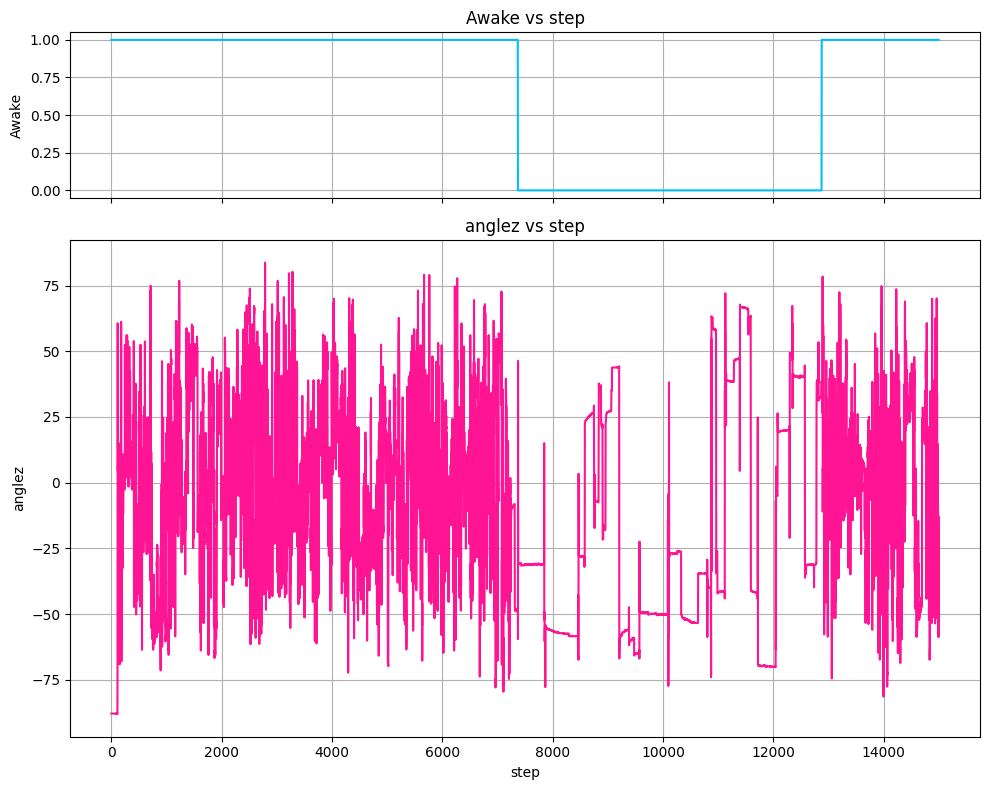

In [11]:
plot_relationship(train_multi_series, "step", "anglez", series_id="1087d7b0ff2e", plot_type="line", color='deeppink')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sleep_series(df, series_id):
    """Plots anglez, enmo, and awake over time for a given series_id."""
    df_series = df[df['series_id'] == series_id][:10000]

    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    
    sns.lineplot(data=df_series, x="step", y="anglez", ax=axes[0], label="Angle Z", color="tomato")
    axes[0].set_title("Angle Z over Time")
    axes[0].grid('on')
    
    sns.lineplot(data=df_series, x="step", y="enmo", ax=axes[1], label="ENMO", color="darkslateblue")
    axes[1].set_title("ENMO over Time")
    axes[1].grid('on')
    
    sns.lineplot(data=df_series, x="step", y="awake", ax=axes[2], label="Awake", color="red")
    axes[2].set_title("Awake State over Time")
    axes[2].grid('on')
    
    plt.xlabel("Step")
    plt.tight_layout()
    plt.show()

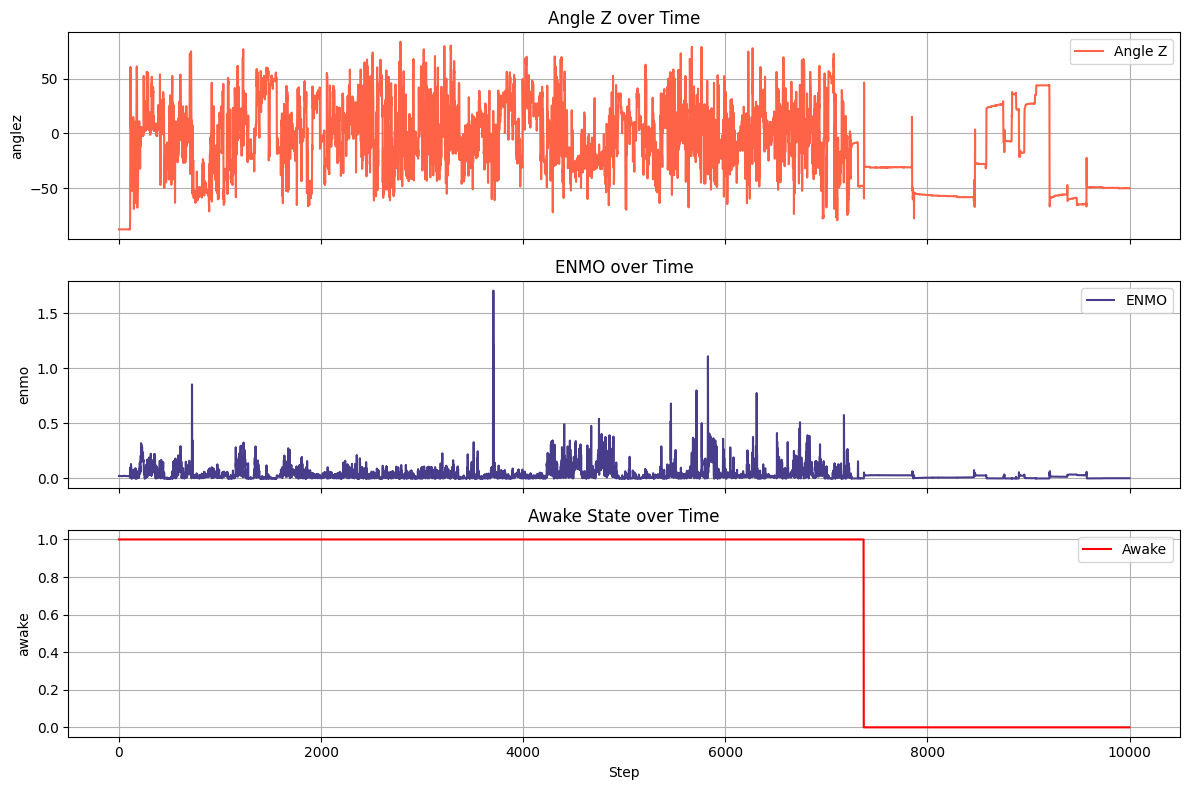

In [13]:
plot_sleep_series(train_series, "1087d7b0ff2e")

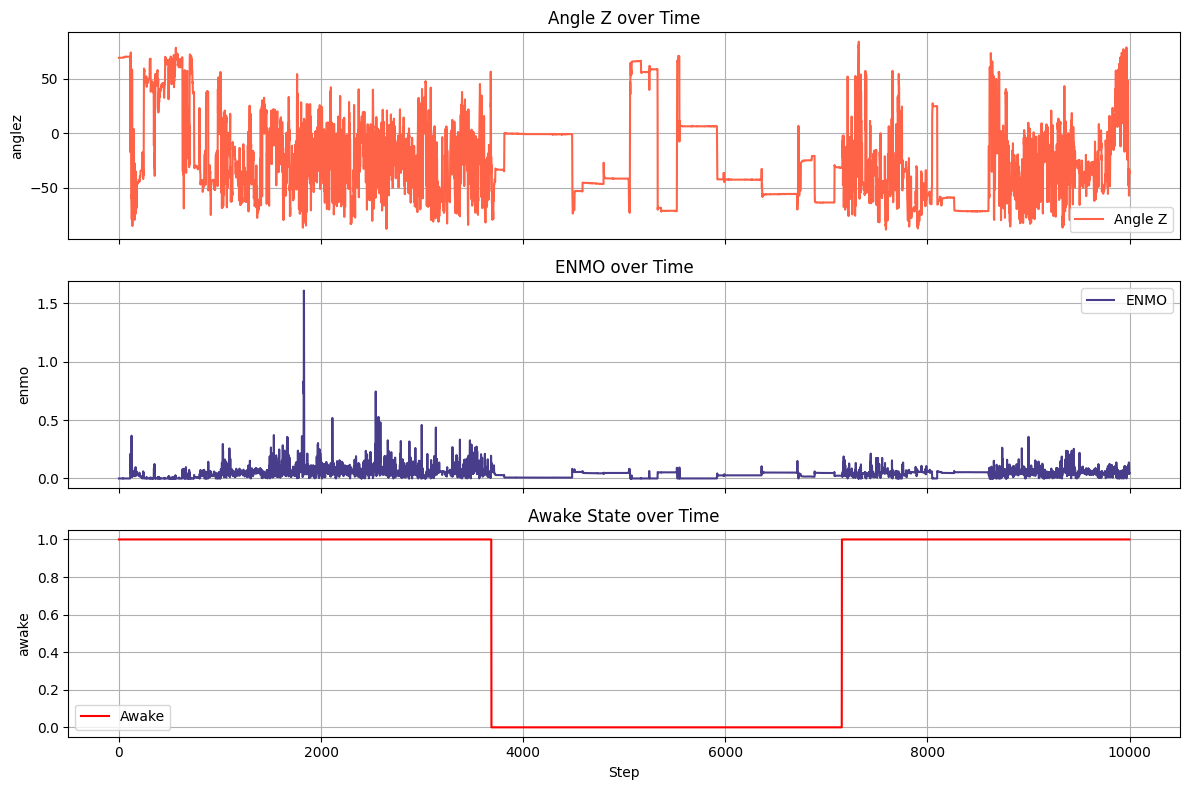

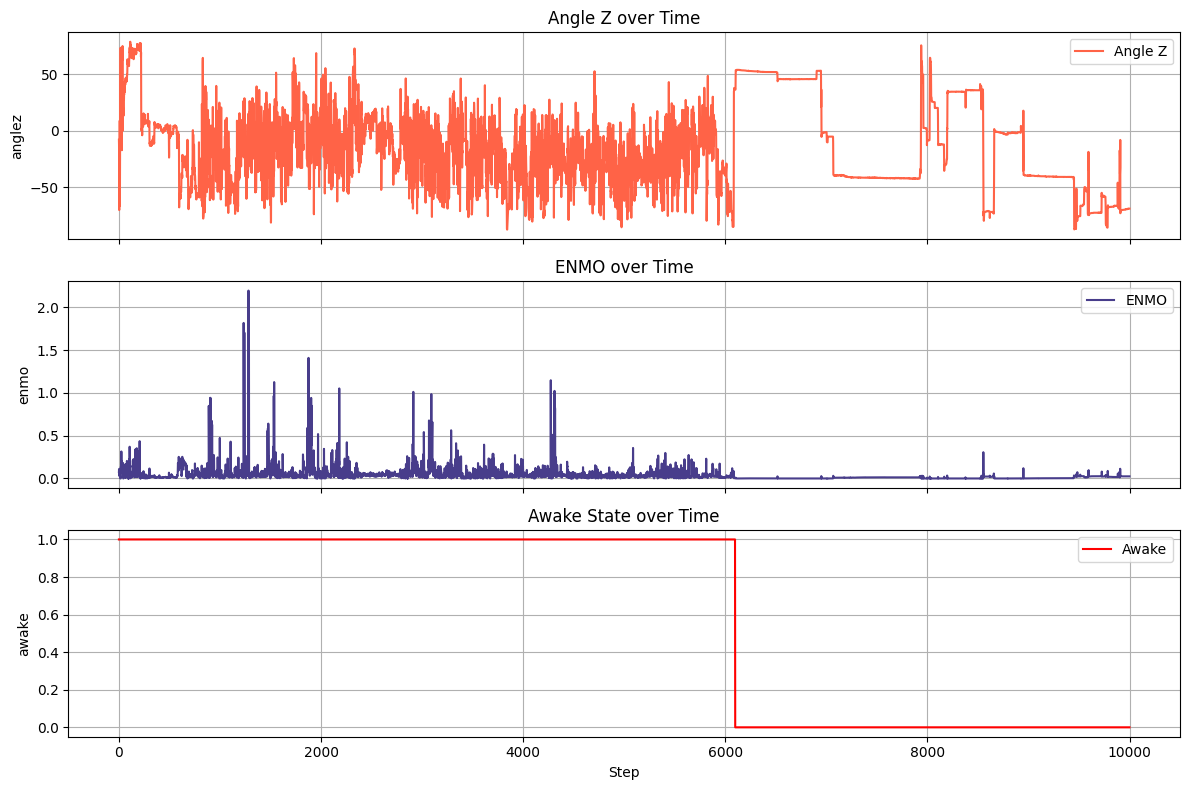

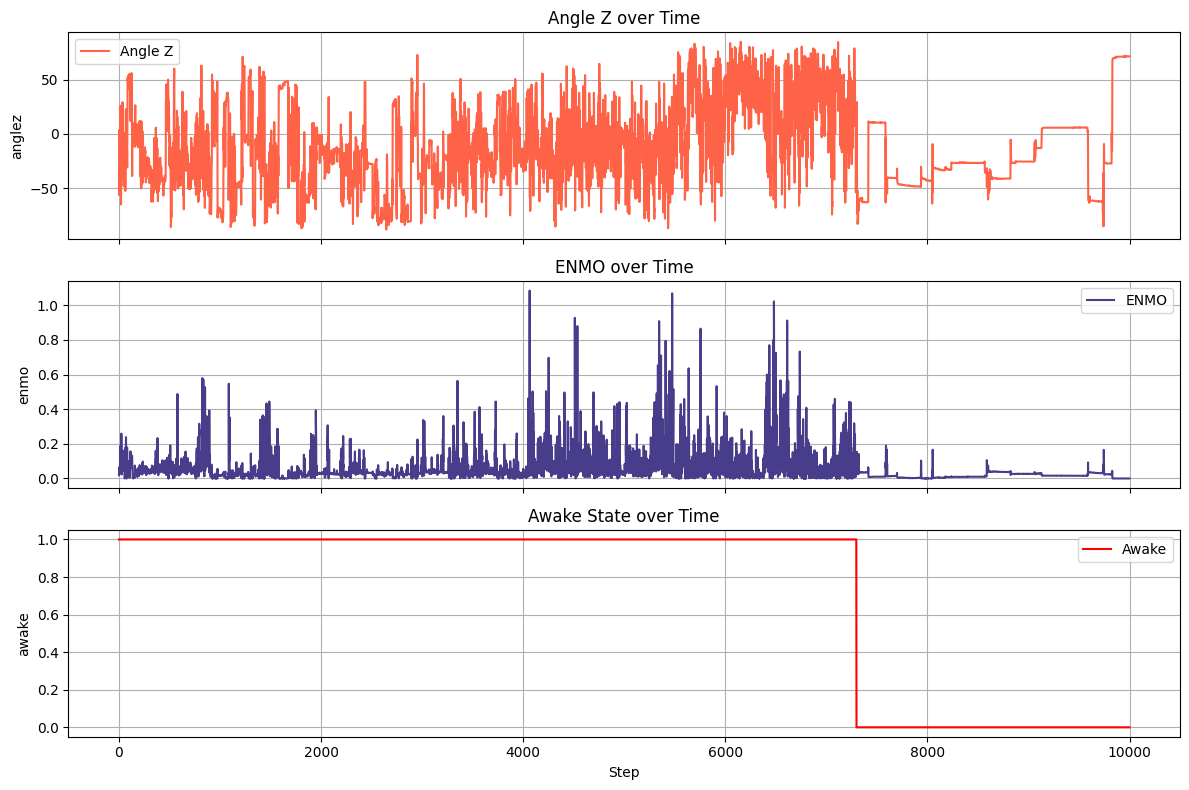

In [14]:
# '89bd631d1769' '8e32047cbc1f' '939932f1822d' '9ee455e4770d' 
plot_sleep_series(train_series, "89bd631d1769")
plot_sleep_series(train_series, "8e32047cbc1f")
plot_sleep_series(train_series, "939932f1822d")

In [15]:
def feature_engineering(df):
    """Adds rolling mean and standard deviation for anglez and enmo."""
    df["anglez_mean"] = df["anglez"].rolling(window=10, min_periods=1).mean()
    df["anglez_std"] = df["anglez"].rolling(window=10, min_periods=1).std()
    df["enmo_mean"] = df["enmo"].rolling(window=10, min_periods=1).mean()
    df["enmo_std"] = df["enmo"].rolling(window=10, min_periods=1).std()
    
    return df

df = feature_engineering(train_multi_series)

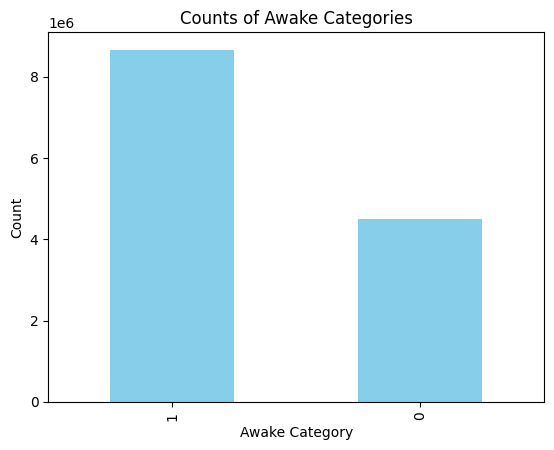

In [17]:
awake_counts = train_series['awake'].value_counts()
awake_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Awake Categories')
plt.xlabel('Awake Category')
plt.ylabel('Count')
plt.show()

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from tqdm import tqdm

# Función para extraer features estadísticas por ventanas con tqdm
def extract_features(df, sequence_length=50):
    features, labels = [], []
    series_ids = df['series_id'].unique()
    
    for series_id in tqdm(series_ids, desc="Procesando series"):
        sub_df = df[df['series_id'] == series_id]
        for i in range(0, len(sub_df) - sequence_length, sequence_length):
            window = sub_df.iloc[i:i+sequence_length]
            features.append([
                window['anglez'].mean(), window['anglez'].std(), window['anglez'].max(), window['anglez'].min(),
                window['enmo'].mean(), window['enmo'].std(), window['enmo'].max(), window['enmo'].min()
            ])
            labels.append(window.iloc[-1]['awake'])
    
    return np.array(features), np.array(labels)

In [36]:
train_series = train_series.drop(columns=['timestamp'])

In [37]:
X, y = extract_features(train_series, sequence_length=50)

Procesando series: 100%|██████████| 35/35 [02:36<00:00,  4.46s/it]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 138504, number of negative: 72129
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 210633, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.657561 -> initscore=0.652443
[LightGBM] [Info] Start training from score 0.652443


LGBMClassifier()

c:\Users\super\anaconda3\envs\aml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9147
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     17981
           1       0.94      0.93      0.94     34678

    accuracy                           0.91     52659
   macro avg       0.90      0.91      0.91     52659
weighted avg       0.91      0.91      0.91     52659



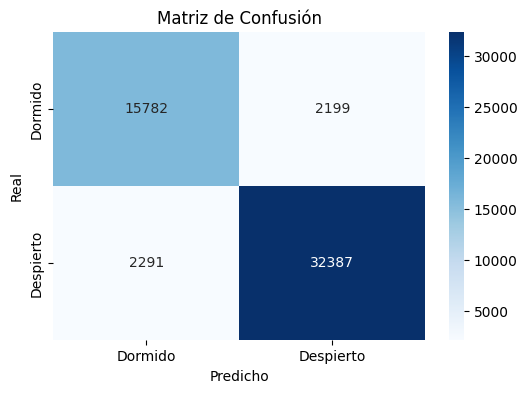

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en el conjunto de test
y_pred = model.predict(X_test)

# 1. Precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Reporte de clasificación (Precision, Recall, F1)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 3. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# 4. Visualizar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Dormido", "Despierto"], yticklabels=["Dormido", "Despierto"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
